In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load the dataset
data = pd.read_csv("/kaggle/input/university-department-performance-dataset/university_department_performance_dataset.csv")
print(data.head())

     ID Category        Date  Graduation Rate (%)  Research Publications  \
0  ID_1   Type B  2018-01-01                  737                 173.23   
1  ID_2   Type D  2018-01-02                  280                 326.42   
2  ID_3   Type A  2018-01-03                  326                 466.75   
3  ID_4   Type D  2018-01-04                  148                 467.71   
4  ID_5   Type D  2018-01-05                   41                 253.98   

      Label  
0  Positive  
1   Neutral  
2  Positive  
3  Negative  
4   Neutral  


In [5]:
#Basic info
print(data.info())

#Check for missing values
print(data.isnull().sum())


#Summary statistics
print(data.describe())

#unic values in categorical columns
print("Unique categories:", data['Category'].unique())
print("Unique lebels:",data['Label'].unique())

print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1000 non-null   object 
 1   Category               1000 non-null   object 
 2   Date                   1000 non-null   object 
 3   Graduation Rate (%)    1000 non-null   int64  
 4   Research Publications  1000 non-null   float64
 5   Label                  1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None
ID                       0
Category                 0
Date                     0
Graduation Rate (%)      0
Research Publications    0
Label                    0
dtype: int64
       Graduation Rate (%)  Research Publications
count          1000.000000            1000.000000
mean            498.291000             261.860660
std             291.720886             139.323181
min               2.000000          

In [6]:
#drop rows with missing values
data = data.dropna()

In [7]:
#Convert Date column to datetime format
data['Date']=pd.to_datetime(data['Date'])



In [18]:
#Check for duplicate roes
data=data.drop_duplicates()

In [8]:
#validate data types
print(data.dtypes)




ID                               object
Category                         object
Date                     datetime64[ns]
Graduation Rate (%)               int64
Research Publications           float64
Label                            object
dtype: object


In [9]:
#
data = data.dropna()
data['Date']=pd.to_datetime(data['Date'])
data=data.drop_duplicates()
print(data.dtypes)

ID                               object
Category                         object
Date                     datetime64[ns]
Graduation Rate (%)               int64
Research Publications           float64
Label                            object
dtype: object


In [10]:
total_graduation_rate=data.groupby('Label')['Graduation Rate (%)'].mean()
print(total_graduation_rate)

average_research_publication=data.groupby('Category')['Research Publications'].min()
print(average_research_publication)

graduation_rate=data.groupby('Category')['Graduation Rate (%)'].max()
print(graduation_rate)

research_publication=data.groupby('Category')['Research Publications'].count()
print(research_publication)

Label
Negative    167865
Neutral     160288
Positive    170138
Name: Graduation Rate (%), dtype: int64
Category
Type A    12.36
Type B    12.76
Type C    14.57
Type D    16.68
Name: Research Publications, dtype: float64
Category
Type A    999
Type B    998
Type C    998
Type D    998
Name: Graduation Rate (%), dtype: int64
Category
Type A    236
Type B    225
Type C    251
Type D    288
Name: Research Publications, dtype: int64


In [11]:
#


data['Month']=data['Date'].dt.month
monthly_graduation_rate=data.groupby('Month')['Graduation Rate (%)'].sum()
print(monthly_graduation_rate)

Month
1     43912
2     45907
3     46765
4     43904
5     45823
6     40197
7     47819
8     43953
9     44858
10    32218
11    31845
12    31090
Name: Graduation Rate (%), dtype: int64


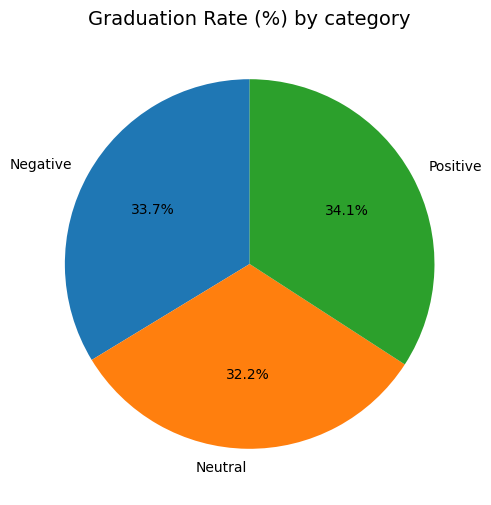

In [72]:
#visualization
plt.figure(figsize=(8, 6))
plt.pie(total_graduation_rate.values, labels=total_graduation_rate.index, autopct='%1.1f%%',startangle=90)
plt.title("Graduation Rate (%) by category", fontsize=14)
plt.show()

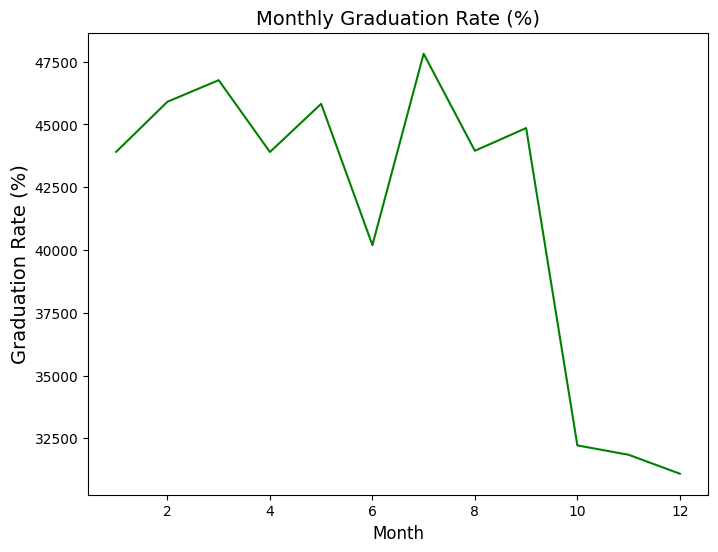

In [16]:
#
plt.figure(figsize=(8, 6))
plt.plot(monthly_graduation_rate.index, monthly_graduation_rate.values, color='green')
plt.title("Monthly Graduation Rate (%)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Graduation Rate (%)", fontsize=14)
plt.show()

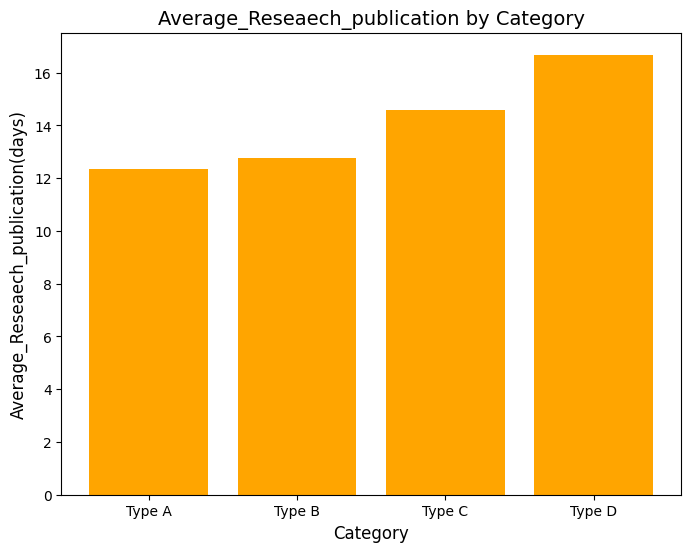

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(average_research_publication.index, average_research_publication.values, color='orange')
plt.title("Average_Reseaech_publication by Category",fontsize=14)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Average_Reseaech_publication(days)", fontsize=12)
plt.show()